<a href="https://colab.research.google.com/github/pankajgupta14061999/Traffic_Flow_Prediction/blob/main/caps_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Total Flow.csv',header=None)

In [ ]:
df=df.iloc[:,:2]

In [ ]:
df.head()

,0,1
0,01-03-21,3.0
1,01-03-21,1.0
2,01-03-21,0.0
3,01-03-21,0.0
4,01-03-21,0.0


In [ ]:
df.shape

(8928, 2)

In [ ]:
df.columns=['date','flow']

In [ ]:
df.head(293)

,date,flow
0,01-03-21,3.0
1,01-03-21,1.0
2,01-03-21,0.0
3,01-03-21,0.0
4,01-03-21,0.0
...,...,...
288,01-03-21,1.0
289,01-03-21,2.0
290,01-03-21,6.0
291,01-03-21,2.0


In [ ]:
import numpy as np
import datetime

In [ ]:
new_date=df['date'][2]
print(new_date)
a_date = datetime.date(2021,int(new_date[3:5]),int(new_date[:2]))
print(int(new_date[:2]))

01-03-21
1


In [ ]:
for i in range(1,df.shape[0],288):
  new_date=df['date'][i-1]
  for j in range(0,287):
    df['date'][i+j]=new_date
  a_date = datetime.date(2021,int(new_date[3:5]),int(new_date[:2]))
  # a_date=datetime.date(2021,int(new_date[3:5]),int(new_date[:2]))
  days = datetime.timedelta(1)
  new_date= a_date +days
  new_date=new_date.strftime('%d-%m-%y')
  df['date'][i+287]=new_date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df.head(288*6+1)

,date,flow
0,01-03-21,3.0
1,01-03-21,1.0
2,01-03-21,0.0
3,01-03-21,0.0
4,01-03-21,0.0
...,...,...
1724,06-03-21,3.0
1725,06-03-21,2.0
1726,06-03-21,5.0
1727,06-03-21,0.0


In [ ]:
df.to_csv('train11.csv',index=False)

In [ ]:
df=pd.read_csv('/content/train11.csv')

In [ ]:
df.head()

,date,flow
0,01-03-21,3.0
1,01-03-21,1.0
2,01-03-21,0.0
3,01-03-21,0.0
4,01-03-21,0.0


In [ ]:
dates=df['date'].unique()

In [ ]:
dates

array(['01-03-21', '02-03-21', '03-03-21', '04-03-21', '05-03-21',
       '06-03-21', '07-03-21', '08-03-21', '09-03-21', '10-03-21',
       '11-03-21', '12-03-21', '13-03-21', '14-03-21', '15-03-21',
       '16-03-21', '17-03-21', '18-03-21', '19-03-21', '20-03-21',
       '21-03-21', '22-03-21', '23-03-21', '24-03-21', '25-03-21',
       '26-03-21', '27-03-21', '28-03-21', '29-03-21', '30-03-21',
       '31-03-21'], dtype=object)

In [ ]:
dates=list(dates)
dates=dates[14:] # for y_train

In [ ]:
dates

['15-03-21',
 '16-03-21',
 '17-03-21',
 '18-03-21',
 '19-03-21',
 '20-03-21',
 '21-03-21',
 '22-03-21',
 '23-03-21',
 '24-03-21',
 '25-03-21',
 '26-03-21',
 '27-03-21',
 '28-03-21',
 '29-03-21',
 '30-03-21',
 '31-03-21']

In [ ]:
len(dates)

17

In [ ]:
data=pd.DataFrame()

In [ ]:
new_date=dates[0]
print(new_date)

15-03-21


In [ ]:
data['tommorrow']= df[df['date']==new_date]['flow'].values

In [ ]:
data

,tommorrow
0,0.0
1,1.0
2,0.0
3,2.0
4,0.0
...,...
283,0.0
284,2.0
285,0.0
286,1.0


In [ ]:
for i in range(1,len(dates)):
  data1=pd.DataFrame()
  new_date=dates[i]
  data1['tommorrow']= df[df['date']==new_date]['flow'].values
  data=pd.concat([data,data1],axis=0,ignore_index=True)

In [ ]:
data

,tommorrow
0,0.0
1,1.0
2,0.0
3,2.0
4,0.0
...,...
4891,1.0
4892,6.0
4893,1.0
4894,3.0


In [ ]:
new_date=dates[0]
print(new_date)

15-03-21


In [ ]:
import datetime
a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
days = datetime.timedelta(1)
new_date = a_date - days

In [ ]:
new_date=new_date.strftime('%d-%m-%y')
print(new_date)

14-03-21


In [ ]:
data11=pd.DataFrame()
data11['today']=df[df['date']==new_date]['flow']

In [ ]:
data11

,today
3744,3.0
3745,0.0
3746,0.0
3747,0.0
3748,2.0
...,...
4027,NaN
4028,NaN
4029,NaN
4030,NaN


In [ ]:
for i in range(1,len(dates)):
  data1=pd.DataFrame()
  new_date=dates[i]
  a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
  days = datetime.timedelta(1)
  new_date = a_date - days
  data1['today']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
  data11=pd.concat([data11,data1],ignore_index=True)

In [ ]:
data11.head(289)

,today
0,3.0
1,0.0
2,0.0
3,0.0
4,2.0
...,...
284,NaN
285,NaN
286,NaN
287,NaN


In [ ]:
new_date=dates[0]
print(new_date)

15-03-21


In [ ]:
import datetime
a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
days = datetime.timedelta(7)
new_date = a_date - days

In [ ]:
data77=pd.DataFrame()
data77['last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']

In [ ]:
data77

,last_week
2016,1.0
2017,0.0
2018,1.0
2019,0.0
2020,4.0
...,...
2299,2.0
2300,2.0
2301,3.0
2302,1.0


In [ ]:
for i in range(1,len(dates)):
  data1=pd.DataFrame()
  new_date=dates[i]
  a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
  days = datetime.timedelta(7)
  new_date = a_date - days
  data1['last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
  data77=pd.concat([data77,data1],ignore_index=True)

In [ ]:
data77

,last_week
0,1.0
1,0.0
2,1.0
3,0.0
4,4.0
...,...
4891,2.0
4892,7.0
4893,3.0
4894,1.0


In [ ]:
new_date=dates[0]
print(new_date)

15-03-21


In [ ]:
import datetime
a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
days = datetime.timedelta(14)
new_date = a_date - days

In [ ]:
data1414=pd.DataFrame()
data1414['last_to_last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']

In [ ]:
data1414

,last_to_last_week
0,3.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
283,3.0
284,0.0
285,4.0
286,1.0


In [ ]:
for i in range(1,len(dates)):
  data1=pd.DataFrame()
  new_date=dates[i]
  a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
  days = datetime.timedelta(14)
  new_date = a_date - days
  data1['last_to_last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
  data1414=pd.concat([data1414,data1],ignore_index=True)

In [ ]:
data1414

,last_to_last_week
0,3.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
4891,0.0
4892,3.0
4893,1.0
4894,2.0


In [ ]:
data=pd.concat([data1414,data77,data11,data],axis=1)

In [ ]:
data

,last_to_last_week,last_week,today,tommorrow
0,3.0,1.0,3.0,0.0
1,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,2.0
4,0.0,4.0,2.0,0.0
...,...,...,...,...
4891,0.0,2.0,6.0,1.0
4892,3.0,7.0,2.0,6.0
4893,1.0,3.0,4.0,1.0
4894,2.0,1.0,5.0,3.0


In [ ]:
data.to_csv('final_data.csv',index=False)

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/final_data.csv')

In [ ]:
df

,last_to_last_week,last_week,today,tommorrow
0,3.0,1.0,3.0,0
1,1.0,0.0,0.0,1
2,0.0,1.0,0.0,0
3,0.0,0.0,0.0,2
4,0.0,4.0,2.0,0
...,...,...,...,...
4891,0.0,2.0,6.0,1
4892,3.0,7.0,2.0,6
4893,1.0,3.0,4.0,1
4894,2.0,1.0,5.0,3


In [ ]:
df.isnull().sum()

last_to_last_week    12
last_week            12
today                12
tommorrow             0
dtype: int64

In [ ]:
def converter1(df):
  import datetime
  df.columns=['date','flow']
  new_date=df['date'][2]
  print(new_date)
  a_date = datetime.date(2021,int(new_date[3:5]),int(new_date[:2]))
  print(int(new_date[:2]))
  for i in range(1,df.shape[0],288):
    new_date=df['date'][i-1]
    for j in range(0,287):
      df['date'][i+j]=new_date
    a_date = datetime.date(2021,int(new_date[3:5]),int(new_date[:2]))
  # a_date=datetime.date(2021,int(new_date[3:5]),int(new_date[:2]))
    days = datetime.timedelta(1)
    new_date= a_date +days
    new_date=new_date.strftime('%d-%m-%y')
    df['date'][i+287]=new_date
  dates=df['date'].unique()
  dates=list(dates)
  dates=dates[14:] # for y_train
  data=pd.DataFrame()
  new_date=dates[0]
# print(new_date)
  data['tommorrow']= df[df['date']==new_date]['flow'].values
  for i in range(1,len(dates)):
    data1=pd.DataFrame()
    new_date=dates[i]
    data1['tommorrow']= df[df['date']==new_date]['flow'].values
    data=pd.concat([data,data1],axis=0,ignore_index=True)
  new_date=dates[0]
# print(new_date)
  import datetime
  a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
  days = datetime.timedelta(1)
  new_date = a_date - days
  new_date=new_date.strftime('%d-%m-%y')
# print(new_date)
  data11=pd.DataFrame()
  data11['today']=df[df['date']==new_date]['flow']
  for i in range(1,len(dates)):
    data1=pd.DataFrame()
    new_date=dates[i]
    a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
    days = datetime.timedelta(1)
    new_date = a_date - days
    data1['today']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
    data11=pd.concat([data11,data1],ignore_index=True)
  new_date=dates[0]
# print(new_date)
  import datetime
  a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
  days = datetime.timedelta(7)
  new_date = a_date - days
  data77=pd.DataFrame()
  data77['last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
  for i in range(1,len(dates)):
    data1=pd.DataFrame()
    new_date=dates[i]
    a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
    days = datetime.timedelta(7)
    new_date = a_date - days
    data1['last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
    data77=pd.concat([data77,data1],ignore_index=True)
  new_date=dates[0]
# print(new_date)
  import datetime
  a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
  days = datetime.timedelta(14)
  new_date = a_date - days
  data1414=pd.DataFrame()
  data1414['last_to_last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
  for i in range(1,len(dates)):
    data1=pd.DataFrame()
    new_date=dates[i]
    a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
    days = datetime.timedelta(14)
    new_date = a_date - days
    data1['last_to_last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
    data1414=pd.concat([data1414,data1],ignore_index=True)
  data=pd.concat([data1414,data77,data11,data],axis=1)
  return data

In [ ]:
df=df.fillna(df.mean())

In [ ]:
df.isnull().sum()

last_to_last_week    0
last_week            0
today                0
tommorrow            0
dtype: int64

In [ ]:
df.values

array([[3., 1., 3., 0.],
       [1., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [1., 3., 4., 1.],
       [2., 1., 5., 3.],
       [1., 2., 2., 2.]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0, 1)).fit(df.iloc[:,:-1].values)
scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(df.iloc[:,-1].values.reshape(-1,1))
x_scaled= scaler_x.transform(df.iloc[:,:-1].values)
y_scaled= scaler_y.transform(df.iloc[:,-1].values.reshape(-1,1))


In [ ]:
x_scaled

array([[0.01090909, 0.01030928, 0.01107011],
       [0.00363636, 0.        , 0.        ],
       [0.        , 0.01030928, 0.        ],
       ...,
       [0.00363636, 0.03092784, 0.01476015],
       [0.00727273, 0.01030928, 0.01845018],
       [0.00363636, 0.02061856, 0.00738007]])

In [ ]:
y_scaled

array([[0.        ],
       [0.00369004],
       [0.        ],
       ...,
       [0.00369004],
       [0.01107011],
       [0.00738007]])

In [ ]:
length=len(x_scaled)
print(length)
len(x_scaled[length-288:,:])
len(x_scaled[:-288,:])

4896


4608

In [ ]:
x_test1=x_scaled[length-1-23:,:]
print(x_test1)

[[0.         0.06185567 0.00369004]
 [0.01090909 0.02061856 0.01107011]
 [0.         0.05154639 0.01476015]
 [0.01454545 0.08247423 0.02583026]
 [0.01090909 0.02061856 0.00369004]
 [0.01090909 0.04123711 0.01476015]
 [0.01818182 0.         0.00738007]
 [0.01090909 0.01030928 0.01107011]
 [0.01454545 0.01030928 0.01107011]
 [0.01090909 0.04123711 0.00369004]
 [0.00363636 0.01030928 0.00369004]
 [0.         0.03092784 0.04059041]
 [0.01454545 0.03092784 0.01107011]
 [0.02545455 0.02061856 0.02214022]
 [0.00363636 0.09278351 0.01476015]
 [0.00363636 0.         0.02214022]
 [0.00363636 0.03092784 0.        ]
 [0.01818182 0.02061856 0.00369004]
 [0.00363636 0.05154639 0.00738007]
 [0.         0.02061856 0.02214022]
 [0.01090909 0.07216495 0.00738007]
 [0.00363636 0.03092784 0.01476015]
 [0.00727273 0.01030928 0.01845018]
 [0.00363636 0.02061856 0.00738007]]


In [ ]:
x_scaled[length-288:,:].shape

(288, 3)

In [ ]:
x_test=list(x_scaled[length-288:,:])
x_test=x_test[::12]
x_test=np.array(x_test)
print(x_test)

y_test=list(y_scaled[length-288:,:])
y_test=y_test[::12]
y_test=np.array(y_test)
print(y_test)

[[0.00363636 0.03092784 0.        ]
 [0.         0.         0.00369004]
 [0.         0.         0.00369004]
 [0.         0.         0.        ]
 [0.00363636 0.         0.        ]
 [0.         0.05154639 0.        ]
 [0.00727273 0.         0.00369004]
 [0.04363636 0.02061856 0.01845018]
 [0.04       0.12371134 0.02583026]
 [0.09090909 0.19587629 0.09594096]
 [0.07636364 0.20618557 0.05535055]
 [0.08727273 0.39175258 0.15498155]
 [0.10545455 0.32989691 0.11439114]
 [0.16       0.19587629 0.17343173]
 [0.14909091 0.16494845 0.16605166]
 [0.2        0.55670103 0.21402214]
 [0.12727273 0.65979381 0.25461255]
 [0.14545455 0.70103093 0.19188192]
 [0.10181818 0.31958763 0.13284133]
 [0.10545455 0.21649485 0.09225092]
 [0.02545455 0.13402062 0.08118081]
 [0.00363636 0.07216495 0.02214022]
 [0.         0.06185567 0.00369004]
 [0.01454545 0.03092784 0.01107011]]
[[0.00369004]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.00369004]
 [0.00369004]
 [0.02214022]
 [0.05904059]
 [0.09225

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,random_state=42,test_size=0.3)
x_train=x_scaled[:-288,:]
y_train=y_scaled[:-288,:]
# x_test=x_scaled[length-288:,:]
# x_test=x_scaled[length-288:,:]
# y_test=y_scaled[length-288:,:]

In [ ]:
import numpy as np
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM, GRU
from keras.models import Sequential
def get_lstm(units):
    """LSTM(Long Short-Term Memory)
    Build LSTM Model.
    # Arguments
        units: List(int), number of input, output and hidden units.
    # Returns
        model: Model, nn model.
    """

    model = Sequential()
    # model.add(LSTM())
    model.add(LSTM(units[1], input_shape=(units[0], 1), return_sequences=True))
    model.add(LSTM(units[2]))
    model.add(Dropout(0.2))
    model.add(Dense(units[3], activation='sigmoid'))

    return model
m = get_lstm([3, 64, 64, 1])

In [ ]:
def train_model(model, X_train, y_train):
    """train
    train a single model.
    # Arguments
        model: Model, NN model to train.
        X_train: ndarray(number, lags), Input data for train.
        y_train: ndarray(number, ), result data for train.
        name: String, name of model.
        config: Dict, parameter for train.
    """

    model.compile(loss="mse", optimizer="rmsprop", metrics=['mape'])
    # early = EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='auto')
    hist = model.fit(
        X_train, y_train,
        batch_size=256,
        epochs=600,
        validation_split=0.05)

    model.save('E:/TrafficFlowPrediction-master/TrafficFlowPrediction-master/model/lstm'  + '.h5')
    df = pd.DataFrame.from_dict(hist.history)
    df.to_csv('E:/TrafficFlowPrediction-master/TrafficFlowPrediction-master/model/lstm' + ' loss.csv', encoding='utf-8', index=False)
train_model(m, x_train, y_train)

Epoch 1/600
18/18 [==============================] - 9s 116ms/step - loss: 0.1549 - mape: 79159780.2105 - val_loss: 0.0298 - val_mape: 7153032.5000
Epoch 2/600
18/18 [==============================] - 0s 19ms/step - loss: 0.0332 - mape: 33942571.2632 - val_loss: 0.0085 - val_mape: 2814461.5000
Epoch 3/600
18/18 [==============================] - 0s 17ms/step - loss: 0.0196 - mape: 18264971.0526 - val_loss: 0.0077 - val_mape: 2208249.0000
Epoch 4/600
18/18 [==============================] - 0s 17ms/step - loss: 0.0193 - mape: 15637364.7895 - val_loss: 0.0064 - val_mape: 2234119.0000
Epoch 5/600
18/18 [==============================] - 0s 18ms/step - loss: 0.0188 - mape: 15295207.5789 - val_loss: 0.0058 - val_mape: 1822697.3750
Epoch 6/600
18/18 [==============================] - 0s 17ms/step - loss: 0.0163 - mape: 13720840.4737 - val_loss: 0.0042 - val_mape: 2421243.7500
Epoch 7/600
18/18 [==============================] - 0s 18ms/step - loss: 0.0141 - mape: 14428187.0526 - val_loss: 0.

In [ ]:
import math
import warnings
import numpy as np
import pandas as pd
#from data.data import process_data
from keras.models import load_model
from keras.utils.vis_utils import plot_model
import sklearn.metrics as metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
def MAPE(y_true, y_pred):
    """Mean Absolute Percentage Error
    Calculate the mape.
    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    # Returns
        mape: Double, result data for train.
    """

    y = [x for x in y_true if x > 0]
    y_pred = [y_pred[i] for i in range(len(y_true)) if y_true[i] > 0]

    num = len(y_pred)
    sums = 0

    for i in range(num):
        tmp = abs(y[i] - y_pred[i]) / y[i]
        sums += tmp

    mape = sums * (100 / num)

    return mape


def eva_regress(y_true, y_pred):
    """Evaluation
    evaluate the predicted resul.
    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    """

    mape = MAPE(y_true, y_pred)
    vs = metrics.explained_variance_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print('explained_variance_score:%f' % vs)
    print('mape:%f%%' % mape)
    print('mae:%f' % mae)
    print('mse:%f' % mse)
    print('rmse:%f' % math.sqrt(mse))
    print('r2:%f' % r2)


def plot_results(y_true, y_preds):
    """Plot
    Plot the true data and predicted data.
    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
        names: List, Method names.
    """
    d = '2016-3-4 01:00'
    x = pd.date_range(d, periods=24, freq='60min')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y_true, label='True Data')
    ax.plot(x, y_preds, label='LSTM')

    plt.legend()
    plt.grid(True)
    plt.xlabel('Time of Day')
    plt.ylabel('Flow')

    date_format = mpl.dates.DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    plt.show()

lstm = load_model('E:/TrafficFlowPrediction-master/TrafficFlowPrediction-master/model/lstm.h5')
y_test = scaler_y.inverse_transform(y_test.reshape(-1,1)).reshape(1, -1)[0]
y_preds = []
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
file = 'LSTM' + '.png'
plot_model(lstm, to_file=file, show_shapes=True)
predicted = lstm.predict(x_test)
predicted = scaler_y.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
print(predicted)
y_preds=predicted
print('LSTM')
# eva_regress(y_test, predicted)


[ 2.7117903   0.64073545  0.64073545  0.6197206   0.7304404   4.0866895
  0.88141304  6.6439614  19.005188   35.947742   31.47353    42.276604
 42.316902   57.02127    52.182312   58.45878    52.843376   51.262577
 41.815205   40.6458     17.85756     7.117531    5.0784264   4.2967815 ]
LSTM


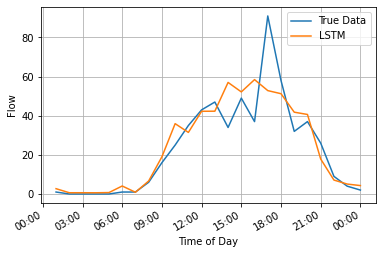

In [ ]:
plot_results(y_test, y_preds)

In [ ]:
eva_regress(y_test, predicted)

explained_variance_score:0.783745
mape:50.352068%
mae:6.270670
mse:119.425732
rmse:10.928208
r2:0.782133


**Finding Correlation**


```
`# This is formatted as code`
```



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data1=pd.read_excel('/content/drive/MyDrive/Total Flow1.xls',header=None)
# data1 = pd.read_csv('/content/drive/MyDrive/Total Flow1.csv',header = None)

In [ ]:
data1[0]=df[0]

In [ ]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374
0,2021-01-03,3,1,4,2,1,6,2,5,4,4,10,8,7,10,14,7,11,13,14,10,11,16,10,17,10,18,18,11,25,12,22,28,23,23,17,5,8,6,9,...,7.0,4.0,6.0,9.0,6.0,4.0,2.0,2.0,4.0,4.0,4.0,2.0,15.0,5.0,1.0,5.0,2.0,1.0,4.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,6.0,6.0,2.0,6.0,2.0,6.0,3.0,5.0,2.0,3.0,2.0
1,2021-01-03,1,1,1,1,10,1,8,2,0,0,10,5,6,9,7,6,5,9,11,3,4,10,4,10,7,14,10,7,12,9,11,17,18,11,12,7,8,4,8,...,5.0,5.0,3.0,4.0,3.0,2.0,4.0,5.0,2.0,3.0,3.0,1.0,15.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,5.0,2.0,3.0,5.0,6.0,3.0,3.0,3.0,1.0,2.0,0.0,1.0,3.0,0.0,6.0,1.0,1.0,5.0
2,2021-01-03,0,1,0,1,6,3,5,3,6,4,5,6,4,5,8,7,10,8,10,9,10,12,10,12,5,11,12,5,8,6,6,11,14,8,12,3,8,1,4,...,3.0,2.0,5.0,8.0,5.0,5.0,2.0,2.0,1.0,3.0,5.0,4.0,15.0,3.0,3.0,3.0,4.0,4.0,5.0,2.0,1.0,2.0,2.0,1.0,0.0,3.0,4.0,0.0,0.0,4.0,7.0,1.0,8.0,2.0,9.0,2.0,8.0,0.0,0.0,9.0
3,2021-01-03,0,0,0,1,2,5,4,5,2,3,7,6,7,7,7,5,2,7,7,3,3,7,0,6,1,11,11,1,14,4,9,20,14,7,11,5,7,4,6,...,8.0,5.0,9.0,6.0,7.0,2.0,1.0,3.0,2.0,4.0,4.0,3.0,14.0,2.0,1.0,2.0,3.0,1.0,4.0,5.0,6.0,3.0,6.0,5.0,4.0,6.0,6.0,3.0,1.0,8.0,8.0,2.0,7.0,1.0,5.0,0.0,4.0,1.0,0.0,6.0
4,2021-01-03,0,1,0,1,3,2,3,0,4,2,4,1,0,4,7,0,1,6,5,0,1,8,1,9,4,11,8,3,9,5,7,15,19,6,11,3,6,4,8,...,2.0,6.0,1.0,7.0,5.0,7.0,1.0,3.0,4.0,2.0,4.0,3.0,17.0,5.0,2.0,5.0,4.0,1.0,5.0,0.0,6.0,2.0,6.0,2.0,2.0,6.0,6.0,3.0,4.0,4.0,5.0,5.0,6.0,4.0,5.0,4.0,4.0,4.0,3.0,2.0


In [ ]:
data1.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
370    2
371    2
372    2
373    2
374    2
Length: 375, dtype: int64

In [ ]:
data1 = data1.fillna(data1.mean())

In [ ]:
data1.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
370    0
371    0
372    0
373    0
374    0
Length: 375, dtype: int64

In [ ]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374
0,01-03-21,3,1,4,2,1,6,2,5,4,4,10,8,7,10,14,7,11,13,14,10,11,16,10,17,10,18,18,11,25,12,22,28,23,23,17,5,8,6,9,...,7.0,4.0,6.0,9.0,6.0,4.0,2.0,2.0,4.0,4.0,4.0,2.0,15.0,5.0,1.0,5.0,2.0,1.0,4.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,6.0,6.0,2.0,6.0,2.0,6.0,3.0,5.0,2.0,3.0,2.0
1,01-03-21,1,1,1,1,10,1,8,2,0,0,10,5,6,9,7,6,5,9,11,3,4,10,4,10,7,14,10,7,12,9,11,17,18,11,12,7,8,4,8,...,5.0,5.0,3.0,4.0,3.0,2.0,4.0,5.0,2.0,3.0,3.0,1.0,15.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,5.0,2.0,3.0,5.0,6.0,3.0,3.0,3.0,1.0,2.0,0.0,1.0,3.0,0.0,6.0,1.0,1.0,5.0
2,01-03-21,0,1,0,1,6,3,5,3,6,4,5,6,4,5,8,7,10,8,10,9,10,12,10,12,5,11,12,5,8,6,6,11,14,8,12,3,8,1,4,...,3.0,2.0,5.0,8.0,5.0,5.0,2.0,2.0,1.0,3.0,5.0,4.0,15.0,3.0,3.0,3.0,4.0,4.0,5.0,2.0,1.0,2.0,2.0,1.0,0.0,3.0,4.0,0.0,0.0,4.0,7.0,1.0,8.0,2.0,9.0,2.0,8.0,0.0,0.0,9.0
3,01-03-21,0,0,0,1,2,5,4,5,2,3,7,6,7,7,7,5,2,7,7,3,3,7,0,6,1,11,11,1,14,4,9,20,14,7,11,5,7,4,6,...,8.0,5.0,9.0,6.0,7.0,2.0,1.0,3.0,2.0,4.0,4.0,3.0,14.0,2.0,1.0,2.0,3.0,1.0,4.0,5.0,6.0,3.0,6.0,5.0,4.0,6.0,6.0,3.0,1.0,8.0,8.0,2.0,7.0,1.0,5.0,0.0,4.0,1.0,0.0,6.0
4,01-03-21,0,1,0,1,3,2,3,0,4,2,4,1,0,4,7,0,1,6,5,0,1,8,1,9,4,11,8,3,9,5,7,15,19,6,11,3,6,4,8,...,2.0,6.0,1.0,7.0,5.0,7.0,1.0,3.0,4.0,2.0,4.0,3.0,17.0,5.0,2.0,5.0,4.0,1.0,5.0,0.0,6.0,2.0,6.0,2.0,2.0,6.0,6.0,3.0,4.0,4.0,5.0,5.0,6.0,4.0,5.0,4.0,4.0,4.0,3.0,2.0


In [ ]:
data1.iloc[:,1:]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374
0,3,1,4,2,1,6,2,5,4,4,10,8,7,10,14,7,11,13,14,10,11,16,10,17,10,18,18,11,25,12,22,28,23,23,17,5,8,6,9,5,...,7.0,4.0,6.0,9.0,6.0,4.0,2.0,2.0,4.0,4.0,4.0,2.0,15.0,5.0,1.0,5.0,2.0,1.0,4.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,6.0,6.0,2.0,6.0,2.0,6.0,3.0,5.0,2.0,3.0,2.0
1,1,1,1,1,10,1,8,2,0,0,10,5,6,9,7,6,5,9,11,3,4,10,4,10,7,14,10,7,12,9,11,17,18,11,12,7,8,4,8,4,...,5.0,5.0,3.0,4.0,3.0,2.0,4.0,5.0,2.0,3.0,3.0,1.0,15.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,5.0,2.0,3.0,5.0,6.0,3.0,3.0,3.0,1.0,2.0,0.0,1.0,3.0,0.0,6.0,1.0,1.0,5.0
2,0,1,0,1,6,3,5,3,6,4,5,6,4,5,8,7,10,8,10,9,10,12,10,12,5,11,12,5,8,6,6,11,14,8,12,3,8,1,4,7,...,3.0,2.0,5.0,8.0,5.0,5.0,2.0,2.0,1.0,3.0,5.0,4.0,15.0,3.0,3.0,3.0,4.0,4.0,5.0,2.0,1.0,2.0,2.0,1.0,0.0,3.0,4.0,0.0,0.0,4.0,7.0,1.0,8.0,2.0,9.0,2.0,8.0,0.0,0.0,9.0
3,0,0,0,1,2,5,4,5,2,3,7,6,7,7,7,5,2,7,7,3,3,7,0,6,1,11,11,1,14,4,9,20,14,7,11,5,7,4,6,5,...,8.0,5.0,9.0,6.0,7.0,2.0,1.0,3.0,2.0,4.0,4.0,3.0,14.0,2.0,1.0,2.0,3.0,1.0,4.0,5.0,6.0,3.0,6.0,5.0,4.0,6.0,6.0,3.0,1.0,8.0,8.0,2.0,7.0,1.0,5.0,0.0,4.0,1.0,0.0,6.0
4,0,1,0,1,3,2,3,0,4,2,4,1,0,4,7,0,1,6,5,0,1,8,1,9,4,11,8,3,9,5,7,15,19,6,11,3,6,4,8,4,...,2.0,6.0,1.0,7.0,5.0,7.0,1.0,3.0,4.0,2.0,4.0,3.0,17.0,5.0,2.0,5.0,4.0,1.0,5.0,0.0,6.0,2.0,6.0,2.0,2.0,6.0,6.0,3.0,4.0,4.0,5.0,5.0,6.0,4.0,5.0,4.0,4.0,4.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,1,2,3,2,4,6,6,8,6,9,33,12,13,33,33,11,15,31,24,12,14,21,38,33,12,20,15,14,16,15,20,29,29,19,22,9,19,7,12,11,...,23.0,13.0,29.0,24.0,1.0,7.0,8.0,0.0,12.0,9.0,11.0,10.0,6.0,20.0,5.0,9.0,8.0,3.0,8.0,5.0,4.0,6.0,3.0,7.0,4.0,4.0,5.0,4.0,5.0,7.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,7.0,8.0
8912,6,2,8,5,7,9,11,6,11,4,36,5,3,37,45,2,3,45,37,2,2,38,29,42,6,41,34,8,33,13,21,36,36,28,29,11,12,7,12,12,...,27.0,18.0,28.0,34.0,1.0,9.0,15.0,0.0,6.0,13.0,11.0,16.0,13.0,12.0,11.0,3.0,7.0,9.0,5.0,8.0,11.0,9.0,3.0,9.0,1.0,1.0,7.0,6.0,7.0,10.0,7.0,9.0,5.0,4.0,9.0,6.0,8.0,8.0,4.0,5.0
8913,1,1,3,1,7,4,7,5,9,5,19,8,7,24,42,6,9,34,32,16,19,33,45,36,19,32,24,15,34,18,17,43,41,14,30,8,23,10,14,9,...,27.0,26.0,24.0,27.0,4.0,11.0,14.0,0.0,10.0,13.0,4.0,11.0,7.0,12.0,8.0,9.0,6.0,2.0,8.0,9.0,7.0,2.0,3.0,2.0,5.0,5.0,3.0,9.0,5.0,5.0,8.0,3.0,8.0,8.0,5.0,8.0,8.0,7.0,7.0,6.0
8914,3,2,4,6,6,8,7,8,4,6,16,5,9,15,31,11,14,34,29,11,15,32,42,39,14,33,29,14,31,14,17,34,33,22,33,14,14,6,12,9,...,21.0,21.0,19.0,35.0,0.0,1.0,6.0,0.0,6.0,6.0,4.0,6.0,13.0,11.0,11.0,5.0,6.0,8.0,5.0,3.0,4.0,11.0,4.0,11.0,3.0,4.0,12.0,7.0,8.0,6.0,4.0,7.0,4.0,5.0,5.0,4.0,4.0,6.0,6.0,6.0


In [ ]:
import numpy as np
x= data1.loc[:,1:]
index_max_cor=np.argsort(x.corr()[1])[::-1][1:5]

In [ ]:
index_max_cor

373     2
372    65
371    67
370    49
Name: 1, dtype: int64

In [ ]:
df1=data1.iloc[:,[0,2]]

In [ ]:
df1

,0,2
0,01-03-21,1
1,01-03-21,1
2,01-03-21,1
3,01-03-21,0
4,01-03-21,1
...,...,...
8911,01-03-21,2
8912,01-03-21,2
8913,01-03-21,1
8914,01-03-21,2


In [ ]:
df11=converter1(df1)

01-03-21
1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/

In [ ]:
df11

,last_to_last_week,last_week,today,tommorrow
0,1,0,0,0.0
1,1,0,0,0.0
2,1,1,1,1.0
3,0,1,1,1.0
4,1,0,0,0.0
...,...,...,...,...
4891,0,1,1,NaN
4892,0,0,1,NaN
4893,0,1,0,NaN
4894,2,0,2,NaN


In [ ]:
df11.isna().sum()

last_to_last_week     0
last_week             0
today                 0
tommorrow            12
dtype: int64

In [ ]:
df11=df11.fillna(df11.mean())

In [ ]:
df11

,last_to_last_week,last_week,today,tommorrow
0,1,0,0,0.000000
1,1,0,0,0.000000
2,1,1,1,1.000000
3,0,1,1,1.000000
4,1,0,0,0.000000
...,...,...,...,...
4891,0,1,1,25.297093
4892,0,0,1,25.297093
4893,0,1,0,25.297093
4894,2,0,2,25.297093


In [ ]:
df11.to_csv('final_data2.csv',index=False)

In [ ]:
import numpy as np
ar1=df.values
ar2=df11.values
ar3=np.array([ar1,ar2])

In [ ]:
ar1.shape

(4896, 4)

In [ ]:
ar3

array([[[ 3.        ,  1.        ,  3.        ,  0.        ],
        [ 1.        ,  0.        ,  0.        ,  1.        ],
        [ 0.        ,  1.        ,  0.        ,  0.        ],
        ...,
        [ 1.        ,  3.        ,  4.        ,  1.        ],
        [ 2.        ,  1.        ,  5.        ,  3.        ],
        [ 1.        ,  2.        ,  2.        ,  2.        ]],

       [[ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ],
        ...,
        [ 0.        ,  1.        ,  0.        , 25.29709255],
        [ 2.        ,  0.        ,  2.        , 25.29709255],
        [ 1.        ,  0.        ,  0.        , 25.29709255]]])

In [ ]:
ar3.shape

(2, 4896, 4)